## Resume Screening

A Company always wants to have the right candidate to work for themselves as this accelerate business growth exponentially and leads to huge profits. But selecting the right candidate do bring huge number of problems.

Hiring the right candidate for a company from around 1000s of resume is a very tedious task and have to employ highly skilled professionals. 

Companies spends huge amount of money to select the right candidate and groom them, but failure to hire the right candidate may cause huge loss to a company.This becomes more challenging if there is a high attrition rate. 

Many big companies do lack time to screen each resumes and thus have to hire other professionals to do so, this costs money and it is a serious problem.

To solve these problems a machine learning model is created which helps in sceening resumes to select the right candidate.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../input/resume-dataset/UpdatedResumeDataSet.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

So we have a total of 962 observations or 962 resumes, each having details about a particular candidate

### Let us look at the different job positions (Categories) the resumes are about

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Mechanical Engineer          40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

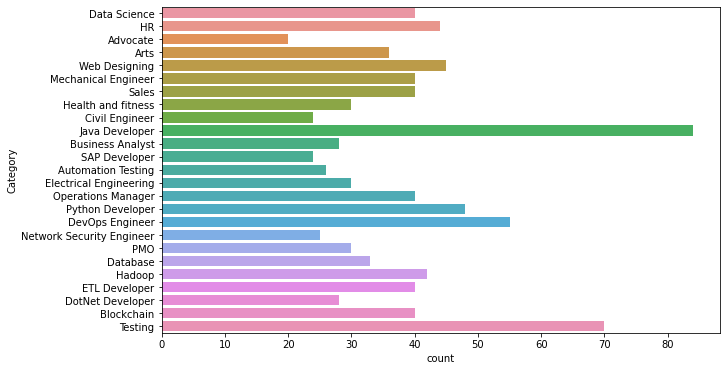

In [7]:
#Plotting CountPLot
plt.figure(figsize=(10,6))
sns.countplot(y = df['Category'])

[]

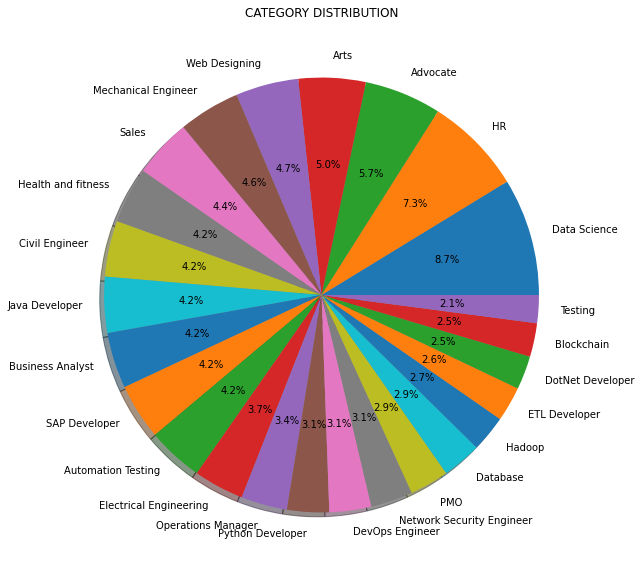

In [8]:
#Plotting the pie chart
plt.figure(figsize=(10,10))
plt.pie(x = df['Category'].value_counts(), labels= df['Category'].unique(), autopct='%1.1f%%', shadow=True)
plt.title('CATEGORY DISTRIBUTION')
plt.plot()

## Data Preprocessing

Here we are to remove the hash tags and special charecters

In [9]:
import re
import nltk
import string
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def clean(text):
    text = re.sub('httpS+s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#S+', ' ', text)  # remove hashtags
    text = re.sub('@S+', ' ', text)  # remove mentions
    text = re.sub('\d', ' ', text)
    
    text = "".join([word for word in text if word not in string.punctuation])    # remove punctuations
    text = " ".join([word for word in  text.split() if word not in stopwords])    #removing Stopwords
    text = re.sub(r'[^x00-x7f]',r' ', text)  #replace consecutive non-ASCII characters with a space
    text = re.sub('s+', ' ', text)  # remove extra whitespace
    
    
    return text
df['cleaned_resume'] = df['Resume'].apply(lambda x: clean(x))

In [11]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma Ma BE UITRGPV Data Scie...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area Intere t Deep Learning Control S tem De...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad Har an...


In [12]:
#Creating a corpus of all cleaned_resume
all = " "
for i in range(df.shape[0]):
    all = all + df['cleaned_resume'][i]

#all

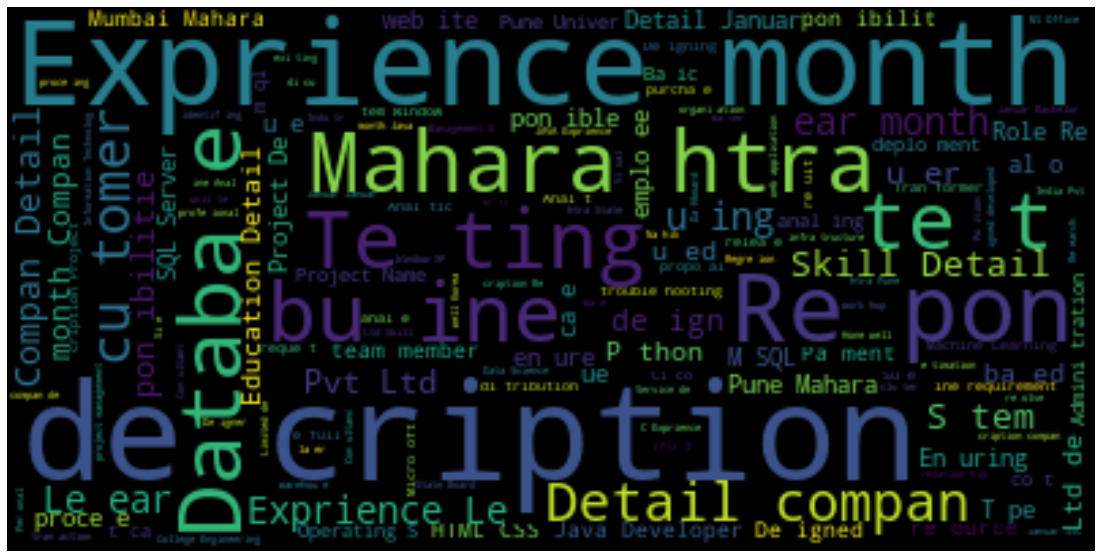

In [13]:
#Creating Bigrams Word Cloud
from wordcloud import WordCloud
wc = WordCloud().generate(all)
plt.figure(figsize = (50,10))
plt.imshow(wc, interpolation='bilinear')     
plt.axis('off')
plt.show()

## Converting the categorical or target variable 

As we have the 'Category' column a categorical variable, we have to convert this into values so that it can be accepted by our model. So we use 'Label Encoder'

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
df['Category_labelled'] = encoder.fit_transform(df['Category'])

In [16]:
#df.head()

## Clean Resume Preprocessing

Here the cleaned_resume column is converted into vectors and to do so we are going to use Tf-idf method.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
text = df['cleaned_resume'].values
target = df['Category_labelled'].values

tfidf = TfidfVectorizer(lowercase=True, max_features= 1500) 
word_features = tfidf.fit_transform(text)   #Required Vector

## Model Building

Splitting the data to train and test for building the model and then testing with its prediction

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = word_features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [21]:
print(X_train.shape)
print(X_test.shape)

(644, 1500)
(318, 1500)


In [22]:
#Using ‘One vs Rest’ method with ‘KNeighborsClassifier’ to build this multiclass classification model.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

knc = OneVsRestClassifier(KNeighborsClassifier())

In [23]:
model = knc.fit(X_train, y_train)

In [24]:
#Prediction of model
prediction = knc.predict(X_test)

In [25]:
#Using XGboost Classifier
from xgboost import XGBClassifier

In [26]:
xgb = XGBClassifier()
model_1 = xgb.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:25:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
pred = xgb.predict(X_test)

## Result

In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
#Printing the accuracy of KNeighborsClassifier model
print("The accuracy score of KNeighborsClassifier for train data is: {:.2f}" .format(accuracy_score(y_train, knc.predict(X_train))))
print("The accuracy score of KNeighborsClassifier for test data is: {:.2f}" .format(accuracy_score(y_test, prediction)))

The accuracy score of KNeighborsClassifier for train data is: 0.98
The accuracy score of KNeighborsClassifier for test data is: 0.97


In [30]:
#Printing the accuracy of XGBClassifier model_1
print("The accuracy score of XGBClassifier for train data is: {:.2f}" .format(accuracy_score(y_train, xgb.predict(X_train))))
print("The accuracy score of XGBClassifier for test data is: {:.2f}" .format(accuracy_score(y_test, pred)))

The accuracy score of XGBClassifier for train data is: 1.00
The accuracy score of XGBClassifier for test data is: 0.99


In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        17
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        13
           4       1.00      0.78      0.88         9
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        10
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00        15
          17       1.00    

Here 0 to 24 are the job ctegories

In [32]:
pd.DataFrame(encoder.classes_, columns= ['Job Categories'])

,Job Categories
0,Advocate
1,Arts
2,Automation Testing
3,Blockchain
4,Business Analyst
5,Civil Engineer
6,Data Science
7,Database
8,DevOps Engineer
9,DotNet Developer


## Conclusion

So we see that with the help of NLP we can easily screen 1000 of resumes in a very short time and having an accuracy score of around 97%.